# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

**Libraries**

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

**Importing DS**

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv")
df = df.drop(['id','date','zipcode','lat','long','yr_renovated'], axis=1)

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

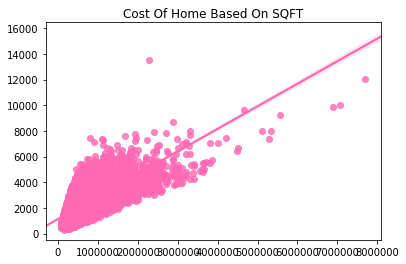

In [3]:
# Need to come back through and make larger, bold font
x = np.array(df['price'])
y = np.array(df['sqft_living'])
# Plotting
fig = sns.regplot(x, y, color='hotpink').set_title('Cost Of Home Based On SQFT')

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [4]:
# Looking at what makes a great house
x = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront',  'condition', 'grade', 'sqft_basement', 'yr_built']] 
y = df['price']
# Little Details AKA
# Fitting the Model
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
# Summarizing
summarize = model.summary()
print(summarize)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3937.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:39:13   Log-Likelihood:            -2.9639e+05
No. Observations:               21613   AIC:                         5.928e+05
Df Residuals:                   21602   BIC:                         5.929e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.589e+06   1.31e+05     50.243

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

   *Features that have p-values  of < 0.05 means we will reject the null hypothesis, thus assuming that there is no significant difference between x and y and having high standard errors means that our coef are less accurate.* 

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

**Removing Outliers**

In [5]:
# Looking at the original shape
print(df.shape)
# Removing outliers
new_df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# Looking at the new shape
print(new_df.shape)

(21613, 15)
(19628, 15)


In [6]:
# Same as above..
x = new_df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront',  'condition', 'grade', 'sqft_basement', 'yr_built']] 
y = new_df['price']
# Fitting our Model
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
# Summarizing
summarizing = model.summary()
print(summarizing)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     2925.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:39:20   Log-Likelihood:            -2.6221e+05
No. Observations:               19628   AIC:                         5.244e+05
Df Residuals:                   19618   BIC:                         5.245e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.336e+06   9.92e+04     53.807

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Only notice a slight change in the coefs, sqft_basement was the one with the most significant change

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [7]:
# Creating a new log variable
new_df['ln_price'] = np.log(new_df['price'])
# Setting up x and y
x = new_df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront',  'condition', 'grade', 'sqft_basement', 'yr_built']] 
y = new_df['ln_price']
# Fitting our model 
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
# Summarizing
summarizing = model.summary()
print(summarizing)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2772.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:39:24   Log-Likelihood:                -4678.7
No. Observations:               19628   AIC:                             9377.
Df Residuals:                   19618   BIC:                             9456.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.8134      0.199    109.769

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
VIF = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(VIF)

[8214.245306736519, 1.6943031668690007, 3.0076860370758545, 4.0450492273312815, 1.1283519115120608, 2.0114348919232468, nan, 1.199410357015754, 2.497010147657055, 1.6574551052141422, 1.8782253464772642]


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [11]:
# Setting up x and y
x = new_df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_basement', 'yr_built']] 
y = new_df['ln_price']
# Fitting the model
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
# Summarizing
summarizing = model.summary()
print(summarizing)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2772.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:39:37   Log-Likelihood:                -4678.7
No. Observations:               19628   AIC:                             9377.
Df Residuals:                   19618   BIC:                             9456.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.8134      0.199    109.769

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Coefs didn't change too much

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

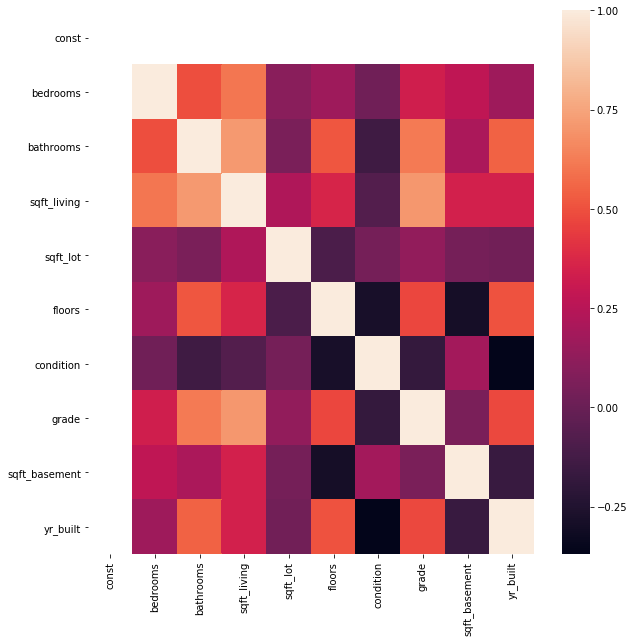

In [12]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(x.corr());

## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

N/A.... I might have missed something...

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [13]:
# My x and y
x = new_df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_basement', 'yr_built']] 
y = new_df['ln_price']
# Fitting the model
x = sm.add_constant(x)
model = sm.OLS(y, x).fit(cov_type='HC3')
predictions = model.predict(x) 
# Summarizing
summarizing = model.summary()
print(summarizing)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2806.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:39:49   Log-Likelihood:                -4678.7
No. Observations:               19628   AIC:                             9377.
Df Residuals:                   19618   BIC:                             9456.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.8134      0.200    109.290

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

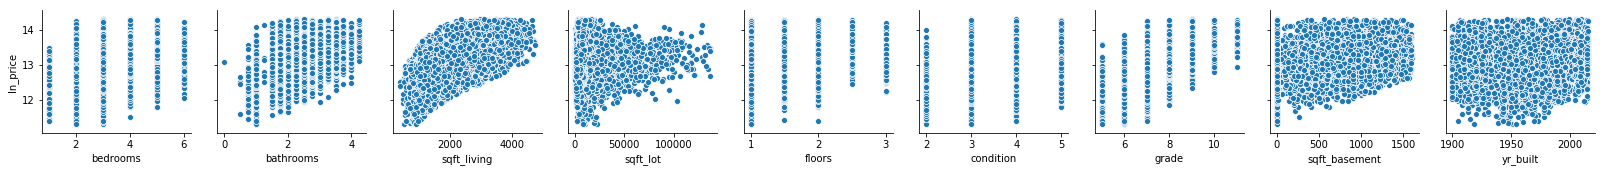

In [19]:
# Didn't have time to make it pink :(
# Just the columns I would like to look at
x_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_basement', 'yr_built']
# Scatterplot of x and y variables
sns.pairplot(data=new_df, y_vars=['ln_price'], x_vars=x_cols);

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

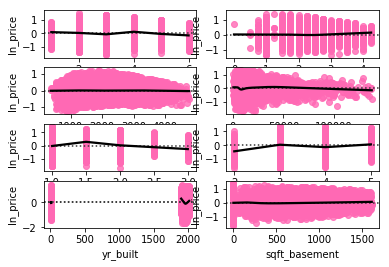

In [16]:
fig, axs = plt.subplots(ncols=2,nrows=4)
# Setting up my variables 
sns.residplot(x['bedrooms'], y, lowess=True, color="black", ax=axs[0][0], scatter_kws={'color':'hotpink'});
sns.residplot(x['bathrooms'], y, lowess=True, color="black", ax=axs[0][1], scatter_kws={'color':'hotpink'});
sns.residplot(x['sqft_living'], y, lowess=True, color="black", ax=axs[1][0], scatter_kws={'color':'hotpink'});
sns.residplot(x['sqft_lot'], y, lowess=True, color="black", ax=axs[1][1], scatter_kws={'color':'hotpink'});
sns.residplot(x['floors'], y, lowess=True, color="black", ax=axs[2][0], scatter_kws={'color':'hotpink'});
sns.residplot(x['condition'], y, lowess=True, color="black", ax=axs[2][1], scatter_kws={'color':'hotpink'});
sns.residplot(x['grade'], y, lowess=True, color="black", ax=axs[3][0], scatter_kws={'color':'hotpink'});
sns.residplot(x['sqft_basement'], y, lowess=True, color="black", ax=axs[3][1], scatter_kws={'color':'hotpink'});
sns.residplot(x['yr_built'], y, lowess=True, color="black", ax=axs[3][0], scatter_kws={'color':'hotpink'});

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [17]:
new_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'ln_price'],
      dtype='object')

In [20]:
# Feature Engineering
new_df['Yr_Built_SQRD'] = new_df['yr_built']**2
new_df['Basement_SQRD'] = new_df['sqft_basement']**2
# Some Columns
x_cols2 = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_basement', 'yr_built']
# Setting up my x and y
x = new_df[x_cols2] 
y = new_df['ln_price']
# Fitting model
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2772.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:42:20   Log-Likelihood:                -4678.7
No. Observations:               19628   AIC:                             9377.
Df Residuals:                   19618   BIC:                             9456.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.8134      0.199    109.769

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.